In [1]:
%matplotlib inline
import requests
import io
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import textstat
from statistics import mean
from scipy.stats import pearsonr
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup

In [2]:
#FACTory or Fiction? Our original menu in 1977 was a whopping two pages long.
#Original Post https://www.facebook.com/thecheesecakefactory/posts/pfbid0piPz22d8ofdfSyK7bBsgQcp4m2C1r5LNftfjUnmTPVk7ELE7gHQj9x6a7ZZdNQAkl?__cft__[0]=AZUmRjBIDz0QZnFDPWQqMUi4ucPnvcrV9VhUK3HQl9QfzcprPx0i3c5ohPFsN6Y22MXqa2t398PpCN3RmGCYIAeUi17Str0uFeMoh1tZwEz1NeF_Za7jHf3K6V-OCS0jOc4UMlbcL0pHEhNP_Pp67XYdvtAMaDYMhyc54sP74bL9tCcKKJvAmvpg9NVKPDBAXASvr1jy2pz82YNxyFUrng_5&__tn__=%2CO%2CP-R
#Source https://console.apify.com/actors/us5srxAYnsrkgUv2v/console
cleanedApify = pd.read_csv('CleanedApify.csv', header=[0])
cleanedApify.to_csv('Q1ResultsCheese.csv', index=False, index_label="Index")
print("Done, Q1ResultsCheese.csv is ready.")

Done, Q1ResultsCheese.csv is ready.


In [3]:
#Question 2 Sentiment analysis
# Example 8
#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pd.read_csv('Q1ResultsCheese.csv', header=[0]).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
descriptiondictionary = inputdata.get('text')
#I am converting the decription from dictionary to a list for the sentiment analyses below
descriptionlist =  list(descriptiondictionary.values())

textblob_results_list=[]
vader_results_list=[]

for i in range(len(descriptionlist )):
    #This is TextBlob Based Sentiment Analysis
    textblob_analyze_polarity = TextBlob(descriptionlist [i]).polarity
    textblob_analyze_subjectivity = TextBlob(descriptionlist [i]).subjectivity
    #polarity values range from -1 to 1 where -1.0 is negative polarity and 1.0 is positive
    #Subjectivity/objectivity  values range from 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective
    #print("Polarity: ", textblob_analyze_polarity)
    #print("Subjectivity: ",textblob_analyze_subjectivity)

    textblob_result = {"TextBlob Polarity Score":textblob_analyze_polarity,"TextBlob Subjectivity Score": textblob_analyze_subjectivity}
    textblob_results_list.append(textblob_result)

    #This is Vader Based Sentiment Analysis
    #Vader provides 4 results labeled as negative, neutral, positive, and compound(overall)
    vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(descriptionlist [i])
    vader_results_list.append(vader_sentiment_analysis)
    #In Vader the compound score is the sum of positive, negative, and neutral scores which is then
    #normalized between -1 [most extreme negative] and 1[most extreme positive]
    #negative represents negative aspects of a tweet
    #positive represents positive aspects of a tweet
    #neutral represents neutral aspects of a tweet
    #print("Polarity Scores in Vader: ", vader_sentiment_analysis)

#This is the TextBlob Sentiment Analysis Results
textblobresults = pd.DataFrame(textblob_results_list)

#This is the Vader Sentiment Analysis Results
vaderresults = pd.DataFrame(vader_results_list)
#print(textblobresults['TextBlob Polarity Score'])
#print(vaderresults['neg'])

file = pd.read_csv('Q1ResultsCheese.csv', header=[0])
file['TextBlob Polarity Score'] = textblobresults['TextBlob Polarity Score']
file['TextBlob Subjectivity Score'] = textblobresults['TextBlob Subjectivity Score']
file['Vader_Neg'] = vaderresults['neg']
file['Vader_Neu'] = vaderresults['neu']
file['Vader_Pos'] = vaderresults['pos']
file['Vader_Com'] = vaderresults['compound']

#Index is false because example 1.csv file already has an index column
file.to_csv('Q2ResultsCheese.csv', index=False, index_label="Index")
print("Done, Q2ResultsCheese.csv is ready.")

Done, Q2ResultsCheese.csv is ready.


In [4]:
file = pd.read_csv('Q2ResultsCheese.csv')
file['likeBins'] = pd.cut(file['likesCount'], [-1,2,41], labels=['x<2', 'x>=2'], right=True)
file

,text,likesCount,TextBlob Polarity Score,TextBlob Subjectivity Score,Vader_Neg,Vader_Neu,Vader_Pos,Vader_Com,likeBins
0,I love the Cheesecake Factory. I have never ha...,27,-0.187500,0.633333,0.000,0.600,0.400,0.8096,x>=2
1,"Had an awful time Saturday night, thank goodne...",2,-0.100000,0.875000,0.146,0.388,0.466,0.7650,x<2
2,Bring back the mushroom soup!,41,0.000000,0.000000,0.000,1.000,0.000,0.0000,x>=2
3,FACT,5,0.000000,0.000000,0.000,1.000,0.000,0.0000,x>=2
4,Bring back Boston House Salad,8,0.000000,0.000000,0.000,1.000,0.000,0.0000,x>=2
...,...,...,...,...,...,...,...,...,...
93,Colleen Carey It was my favorite. White choco...,1,0.133333,0.400000,0.000,0.786,0.214,0.4588,x<2
94,Tobie Balma 💯 I miss that one!,1,0.000000,0.000000,0.213,0.787,0.000,-0.2244,x<2
95,Kasey D Jordan but was the menu drafted in 1977 🤔,1,0.000000,0.000000,0.000,1.000,0.000,0.0000,x<2
96,Katie Higdon Garcia it gives me anxiety 😂,0,0.000000,0.000000,0.220,0.549,0.232,0.2960,x<2


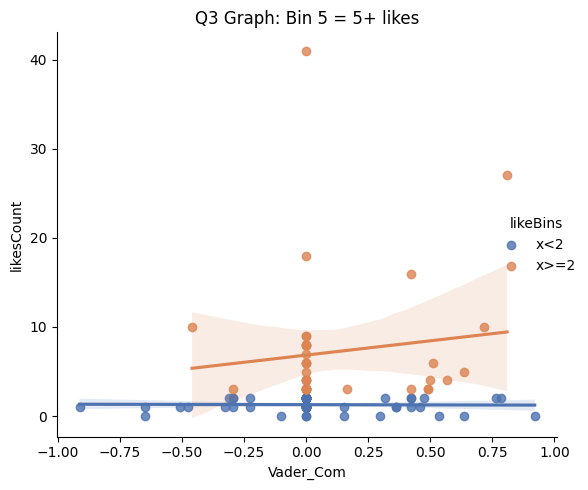

In [5]:
sns.lmplot(data=file, x='Vader_Com', y='likesCount',hue='likeBins',palette="deep")
plt.title('Q3 Graph: Bin 5 = 5+ likes')
plt.ylabel('likesCount')
plt.xlabel('Vader_Com')
plt.tight_layout()
plt.savefig('Q3GraphCheese.png', bbox_inches='tight', dpi=300)
plt.show()

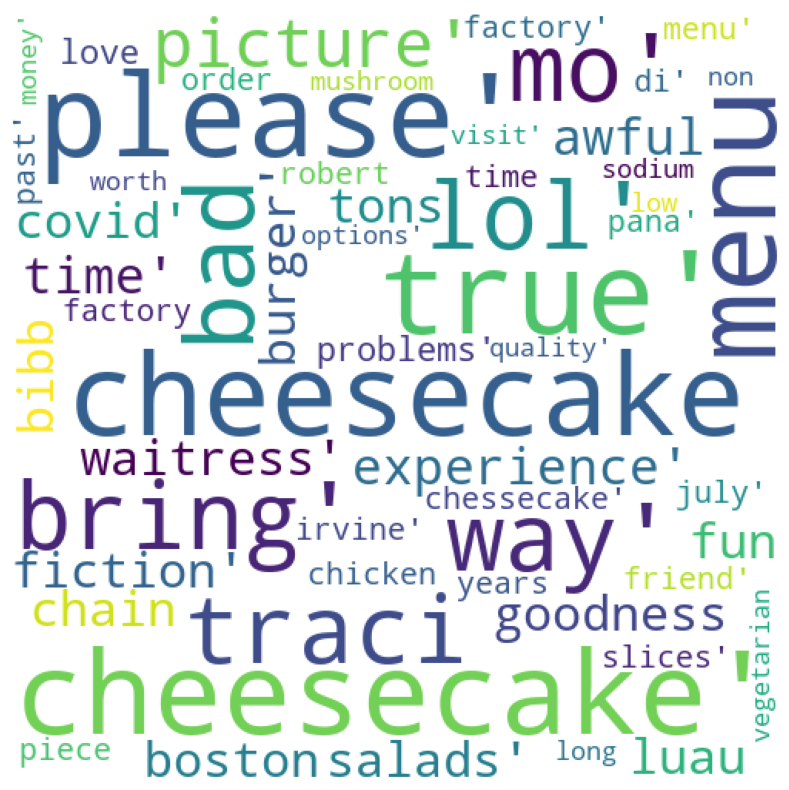

Done, Q4PositiveWordcloudCheese.csv is ready.


In [6]:
#positive word cloud
#example 11

#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = file.loc[(file['Vader_Pos'] > 0)]

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('text')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#convert text to lower case
yelp_review_list_lowercase = [i.lower() for i in yelp_review_list]

#remove special characters
yelp_review_list_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in yelp_review_list]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in yelp_review_list_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

yelp_review_string = ''
for eachletter in  str(cleantext):
    yelp_review_string += eachletter

input = TextBlob(yelp_review_string)

noun_phrases = input.noun_phrases

yelp_review_string = ''
for eachletter in  str(noun_phrases):
    yelp_review_string += eachletter


#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            stopwords=stopwords_list,
            min_font_size = 10).generate(yelp_review_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Q4PositiveWordcloudCheese.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, Q4PositiveWordcloudCheese.csv is ready.")

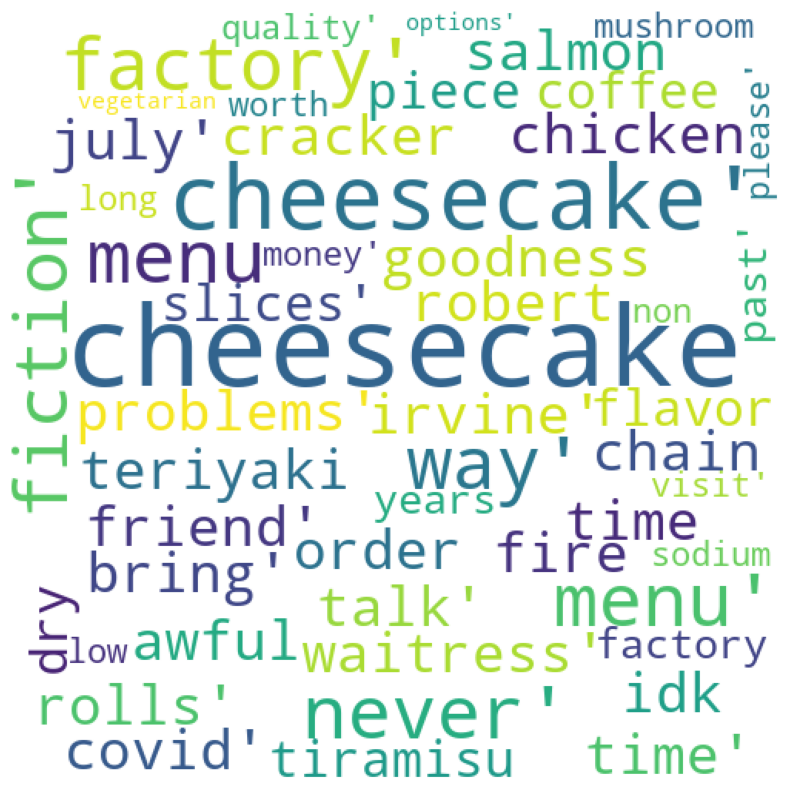

Done, Q5NegativeWordcloudCheese.csv is ready.


In [7]:
#negative word cloud
#example 11

#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = file.loc[(file['Vader_Neg'] > 0)]

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('text')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#convert text to lower case
yelp_review_list_lowercase = [i.lower() for i in yelp_review_list]

#remove special characters
yelp_review_list_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in yelp_review_list]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in yelp_review_list_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

yelp_review_string = ''
for eachletter in  str(cleantext):
    yelp_review_string += eachletter

input = TextBlob(yelp_review_string)

noun_phrases = input.noun_phrases

yelp_review_string = ''
for eachletter in  str(noun_phrases):
    yelp_review_string += eachletter


#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            stopwords=stopwords_list,
            min_font_size = 10).generate(yelp_review_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Q5NegativeWordcloudCheese.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, Q5NegativeWordcloudCheese.csv is ready.")

In [8]:
#Question 6 Yelp Scrape
#example 5
#https://github.com/frizchar/yelp-reviews-scraping/blob/main/Web_Scraping.ipynb



urllist = ['https://www.yelp.com/biz/the-cheesecake-factory-sacramento-2','https://www.yelp.com/biz/the-cheesecake-factory-sacramento-2?start=10','https://www.yelp.com/biz/the-cheesecake-factory-sacramento-2?start=20','https://www.yelp.com/biz/the-cheesecake-factory-sacramento-2?start=30','https://www.yelp.com/biz/the-cheesecake-factory-sacramento-2?start=40']

#I am creating an empty dictionary here
output = {'Reviewer':[],"Review":[], 'Rating':[]}

for url in urllist:
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    #print(soup)
    #Scrape Reviews
    regex = re.compile('.*comment__09f24__D0cxf css-qgunke*')
    results = soup.find_all('p', {'class':regex})
    reviews = [result.text for result in results]
    for review in reviews:
        output['Review'].append(review)
    #Scrape Reviewer Names
    regex2 = re.compile('.*user-passport-info.*')
    results2 = soup.find_all('div', {'class': regex2})
    reviewers = [result.text for result in results2]
    reviewers.pop(0)
    for reviewer in reviewers:
        output['Reviewer'].append(reviewer)
    #Scrape Review Ratings
    # Scrape review ratings
    regex3 = re.compile('.*five-stars.*')
    results3 = soup.find_all('div', {'class': regex3})
    ratings = [result['aria-label'] for result in results3]

    # Replace no ratings with 0
    ratings = [sub.replace('(no rating)', '0') for sub in ratings]
    cleanedratings = []
    # Just keep the number portion of 5 star rating like scraped data
    for rating in ratings:
        cleanedrating = rating.replace(' star rating', '')
        cleanedratings.append(cleanedrating)
    # Finally in this rating list the first 5 ratings do not come from the reviews so I delete them
    cleanedratings = cleanedratings[5:]
    # The last few ratings in the scraped data is also wrong so delete them
    cleanedratings = cleanedratings[:10]
    for rating in cleanedratings:
        output['Rating'].append(rating)


results = pd.DataFrame(output)
#print(results)
results.to_csv('Q6ResultsCheese.csv', index=True, index_label="Index")
print("Done, Q6ResultsCheese.csv is ready.")


Done, Q6ResultsCheese.csv is ready.


In [9]:
#Question 2 Sentiment analysis
# Example 8
#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pd.read_csv('Q6ResultsCheese.csv', header=[0]).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
descriptiondictionary = inputdata.get('Review')
#I am converting the decription from dictionary to a list for the sentiment analyses below
descriptionlist =  list(descriptiondictionary.values())

textblob_results_list=[]
vader_results_list=[]

for i in range(len(descriptionlist )):
    #This is TextBlob Based Sentiment Analysis
    textblob_analyze_polarity = TextBlob(descriptionlist [i]).polarity
    textblob_analyze_subjectivity = TextBlob(descriptionlist [i]).subjectivity
    #polarity values range from -1 to 1 where -1.0 is negative polarity and 1.0 is positive
    #Subjectivity/objectivity  values range from 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective
    #print("Polarity: ", textblob_analyze_polarity)
    #print("Subjectivity: ",textblob_analyze_subjectivity)

    textblob_result = {"TextBlob Polarity Score":textblob_analyze_polarity,"TextBlob Subjectivity Score": textblob_analyze_subjectivity}
    textblob_results_list.append(textblob_result)

    #This is Vader Based Sentiment Analysis
    #Vader provides 4 results labeled as negative, neutral, positive, and compound(overall)
    vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(descriptionlist [i])
    vader_results_list.append(vader_sentiment_analysis)
    #In Vader the compound score is the sum of positive, negative, and neutral scores which is then
    #normalized between -1 [most extreme negative] and 1[most extreme positive]
    #negative represents negative aspects of a tweet
    #positive represents positive aspects of a tweet
    #neutral represents neutral aspects of a tweet
    #print("Polarity Scores in Vader: ", vader_sentiment_analysis)

#This is the TextBlob Sentiment Analysis Results
textblobresults = pd.DataFrame(textblob_results_list)

#This is the Vader Sentiment Analysis Results
vaderresults = pd.DataFrame(vader_results_list)
#print(textblobresults['TextBlob Polarity Score'])
#print(vaderresults['neg'])

file = pd.read_csv('Q6ResultsCheese.csv', header=[0])
file['TextBlob Polarity Score'] = textblobresults['TextBlob Polarity Score']
file['TextBlob Subjectivity Score'] = textblobresults['TextBlob Subjectivity Score']
file['Vader_Neg'] = vaderresults['neg']
file['Vader_Neu'] = vaderresults['neu']
file['Vader_Pos'] = vaderresults['pos']
file['Vader_Com'] = vaderresults['compound']

#Index is false because example 1.csv file already has an index column
file.to_csv('Q7-2ResultsCheese.csv', index=False, index_label="Index")
print("Done, Q7-2ResultsCheeseYelp.csv is ready.")

Done, Q7-2ResultsCheeseYelp.csv is ready.


In [10]:
file = pd.read_csv('Q7-2ResultsCheese.csv')
#file['likeBins'] = pd.cut(file['likesCount'], [-1,2,41], labels=['x<2', 'x>=2'], right=True)
file

,Index,Reviewer,Review,Rating,TextBlob Polarity Score,TextBlob Subjectivity Score,Vader_Neg,Vader_Neu,Vader_Pos,Vader_Com
0,0,"Sue Y.San Mateo, CA","Ventured into The Cheesecake Factory, expectin...",4,0.396111,0.810370,0.000,0.693,0.307,0.9871
1,1,"Kiyomi W.Elite 2023Elk Grove, CA",Came in on a Sunday around 6 with a reservatio...,2,0.063974,0.437692,0.025,0.872,0.103,0.9792
2,2,"Marisol E.Sacramento, CA",Cheesecake factory never disappoints! They're ...,5,0.393750,0.581250,0.000,0.630,0.370,0.9909
3,3,"Gina S.Elite 2023Elk Grove, CA",It's been at least 4 years since I've eaten he...,4,0.270063,0.607651,0.014,0.662,0.324,0.9961
4,4,"Melissa B.Elite 2023Mansion Flats, Sacramento, CA",It's the Cheesecake Factory!! Been here before...,5,0.148241,0.535463,0.000,0.739,0.261,0.9943
5,5,"Eva W.Elite 2023Elk Grove, CA",Came here to get together with some friends. ...,3,0.200000,0.630000,0.000,0.936,0.064,0.7964
6,6,"David L.Elite 2023Sacramento, CA",I haven't been here in ages. Decided to go wit...,4,0.115561,0.586961,0.011,0.753,0.235,0.9906
7,7,"Amy H.Elite 2023Sacramento, CA",Came here a couple nights ago for a celebratio...,3,0.127353,0.577171,0.035,0.823,0.142,0.9868
8,8,"Amanda F.Moreno Valley, CA",Cheesecake Factory... why is your menu 100 pag...,4,0.338843,0.644105,0.023,0.817,0.160,0.9928
9,9,"Peter N.Elite 2023Santa Maria, CA",Nicholle did an amazing job!! I really like th...,5,0.549167,0.628333,0.000,0.655,0.345,0.9928


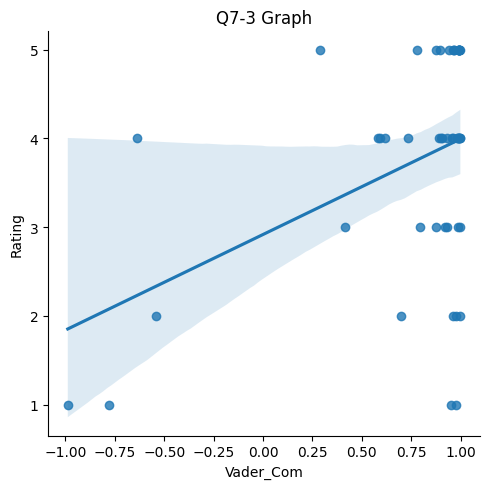

In [11]:
sns.lmplot(data=file, x='Vader_Com', y='Rating',palette="deep")
plt.title('Q7-3 Graph')
plt.ylabel('Rating')
plt.xlabel('Vader_Com')
plt.tight_layout()
plt.savefig('Q7-3GraphCheese.png', bbox_inches='tight', dpi=300)
plt.show()

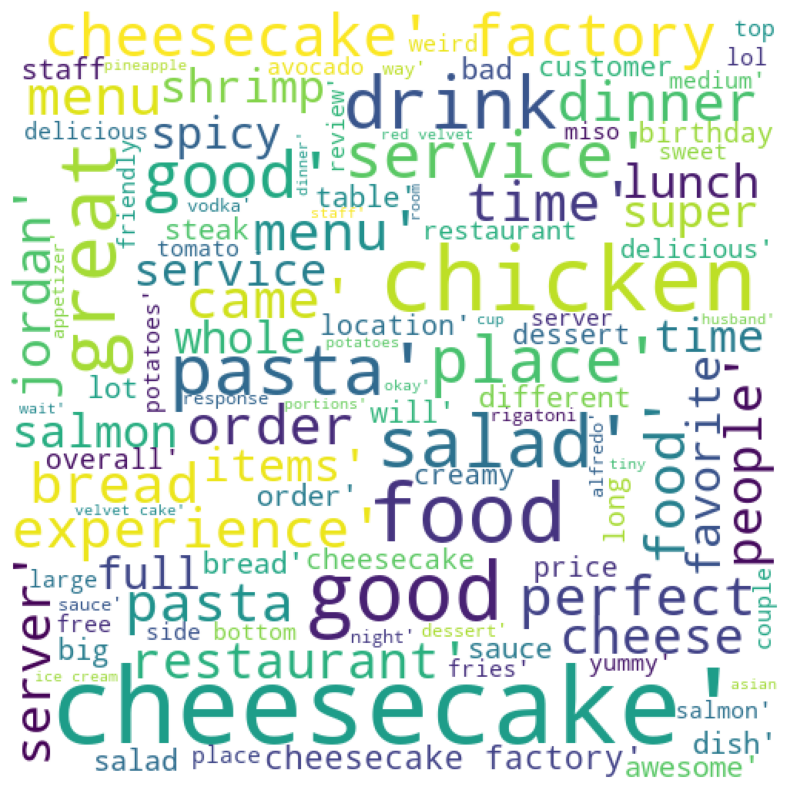

Done, Q7-4PositiveWordcloudCheese.csv is ready.


In [12]:
#positive word cloud
#example 11

#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = file.loc[(file['Vader_Pos'] > 0)]

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('Review')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#convert text to lower case
yelp_review_list_lowercase = [i.lower() for i in yelp_review_list]

#remove special characters
yelp_review_list_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in yelp_review_list]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in yelp_review_list_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

yelp_review_string = ''
for eachletter in  str(cleantext):
    yelp_review_string += eachletter

input = TextBlob(yelp_review_string)

noun_phrases = input.noun_phrases

yelp_review_string = ''
for eachletter in  str(noun_phrases):
    yelp_review_string += eachletter


#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            stopwords=stopwords_list,
            min_font_size = 10).generate(yelp_review_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Q7-4PositiveWordcloudCheese.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, Q7-4PositiveWordcloudCheese.csv is ready.")

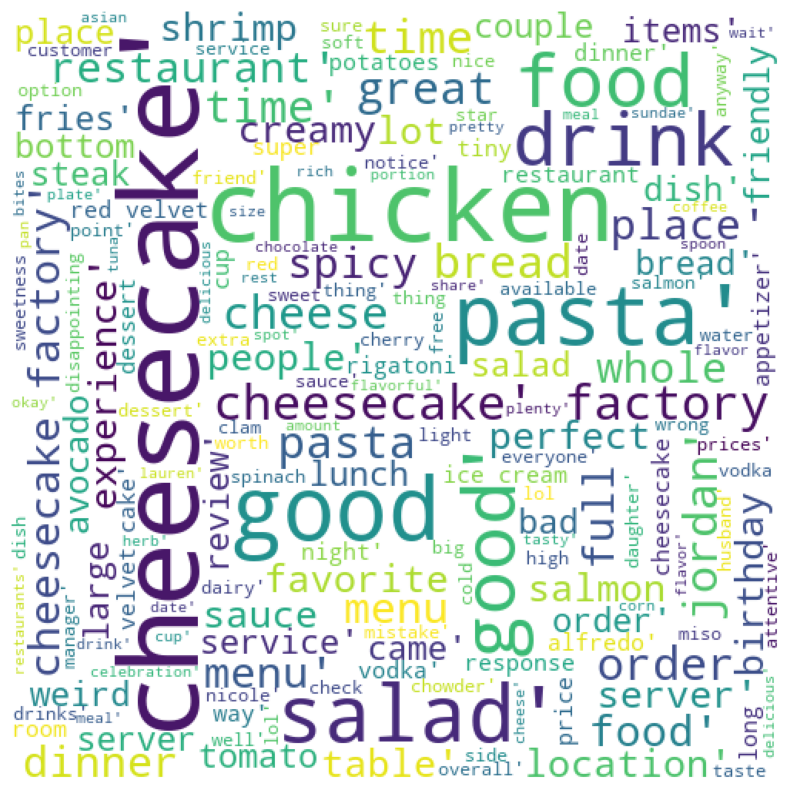

Done, Q7-5NegativeWordcloudCheese.csv is ready.


In [13]:
#negative word cloud
#example 11

#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = file.loc[(file['Vader_Neg'] > 0)]

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('Review')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#convert text to lower case
yelp_review_list_lowercase = [i.lower() for i in yelp_review_list]

#remove special characters
yelp_review_list_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in yelp_review_list]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in yelp_review_list_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

yelp_review_string = ''
for eachletter in  str(cleantext):
    yelp_review_string += eachletter

input = TextBlob(yelp_review_string)

noun_phrases = input.noun_phrases

yelp_review_string = ''
for eachletter in  str(noun_phrases):
    yelp_review_string += eachletter


#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            stopwords=stopwords_list,
            min_font_size = 10).generate(yelp_review_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Q7-5NegativeWordcloudCheese.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, Q7-5NegativeWordcloudCheese.csv is ready.")